In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [154]:
df=pd.read_csv('dataset_model.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#Problem:1 Identify and remove those records which are only providing unique information about records.Capture it in another dataframe.

In [155]:
df.describe()
df.shape

(614, 13)

SOLUTION #1:On just looking on dataset top 10 rows we are familiar with the point that only two columns seems to may have unique values 'Loan_Id','ApplicantIncome',then we only observe aur analysis whether they have different values for each rows and depicts using size and we only find "loan_Id only record that providing unique information

In [0]:
df['Loan_ID'].unique().size

614

In [0]:
df['ApplicantIncome'].unique().size

505

In [32]:
df2=df.drop('Loan_ID',axis=1)
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


PROBLEM#2:Identify continous and categorical columns


In [156]:
continuous = [i for i in df if len(df[i].unique())>5] #Continuous columns was limited to unique values > 5
categorical = [i for i in df if len(df[i].unique())<=5] #Categorical columns was limited to unique values <5
print("List of continuous Columns\n{}\n\nList of Categorical Columns\n{}\n".format(continuous,categorical))

List of continuous Columns
['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

List of Categorical Columns
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']



PROBLEM#3: Perform univariate analysis with plots and record your observation..

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5284baf1d0>,
      dtype=object)

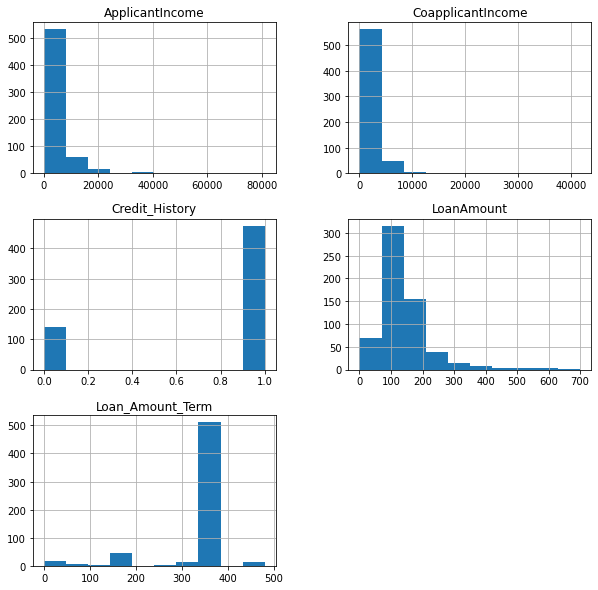

In [157]:
df2.hist(figsize=(10,10))

OBSERVATIONS:1))Many of the Applicants have applies for loan term of more then 360 days 

2)Much People are applying for loan amount which is less in average of every other combined so the company's amount in loan can be given to more people.

3) 10% of People are not having any credit history which is a risk for company to give loan to these people as several other insights maybe required before lending them loan

4)Maximum applicants are earning less then 15k which is also a risk for company while payback time.

5)There is 2% of people in income slab of 40000 which are more beneficial and trust worthy for loan paybacks

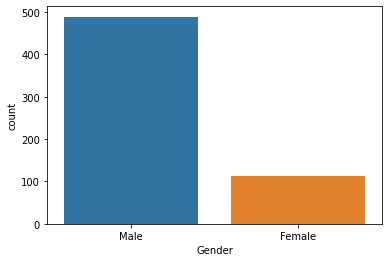

In [35]:
sns.countplot(x='Gender',data=df2)


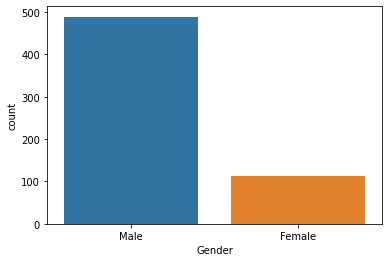

In [36]:
sns.countplot(x='Gender',data=df2)


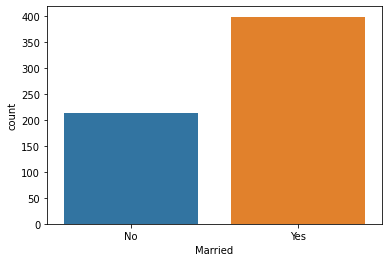

In [37]:
sns.countplot(x='Married',data=df2)


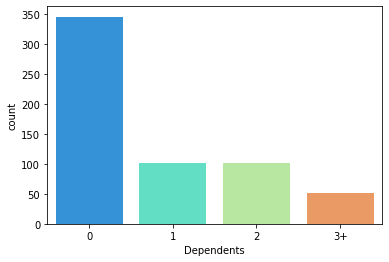

In [0]:
sns.countplot(x='Dependents',data=df2,palette='rainbow')


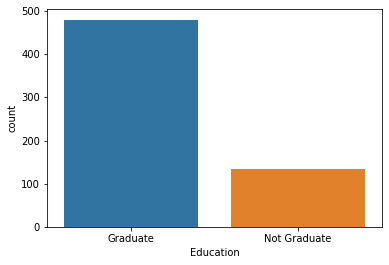

In [0]:
sns.countplot(x='Education',data=df2)


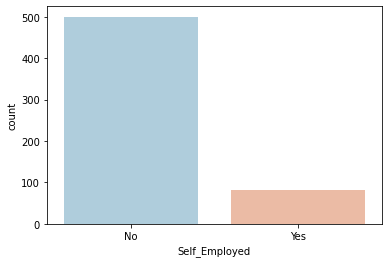

In [0]:
sns.countplot(x='Self_Employed',data=df2,palette='RdBu_r')


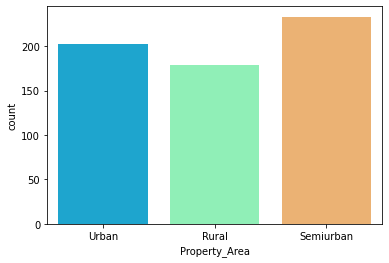

In [0]:
sns.countplot(x='Property_Area',data=df2,palette='rainbow')


PROBLEM#4:Perform bivariate analysis among al independent variables .Draw appropriate plots,mention observations.

Dependent Variable- Loan Status,Loan_amount_term,loan_amount
IndependentVariables- Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoApplicantIncome,CreditHistory,PropertyArea

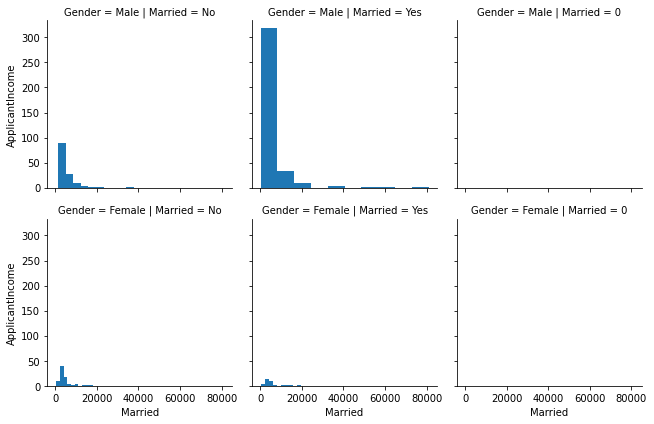

In [128]:
fn = sns.FacetGrid(df,col='Married',row='Gender',height=3, aspect=1)
fn = fn.map(plt.hist,"ApplicantIncome")
fn.set_xlabels('Married')
fn.set_ylabels('ApplicantIncome')

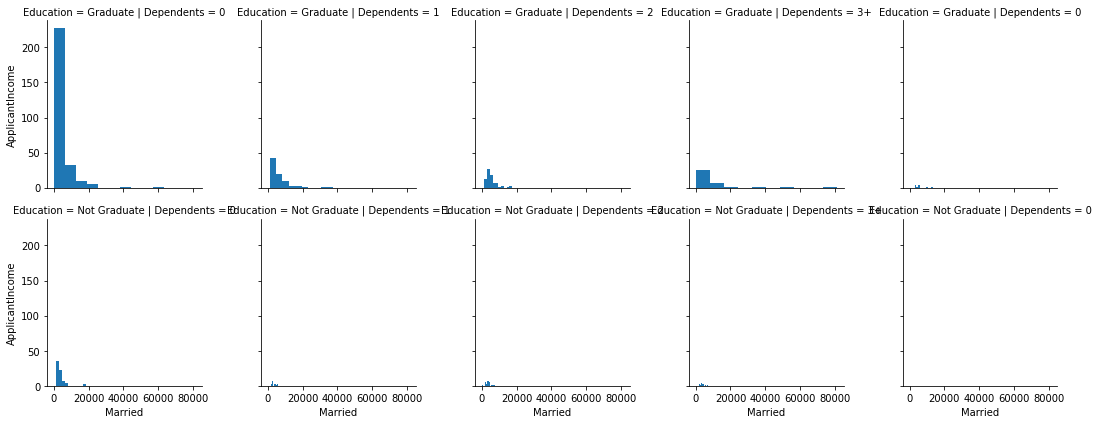

In [129]:
fn = sns.FacetGrid(df,col='Dependents',row='Education',height=3, aspect=1)
fn = fn.map(plt.hist,"ApplicantIncome")
fn.set_xlabels('Married')
fn.set_ylabels('ApplicantIncome')

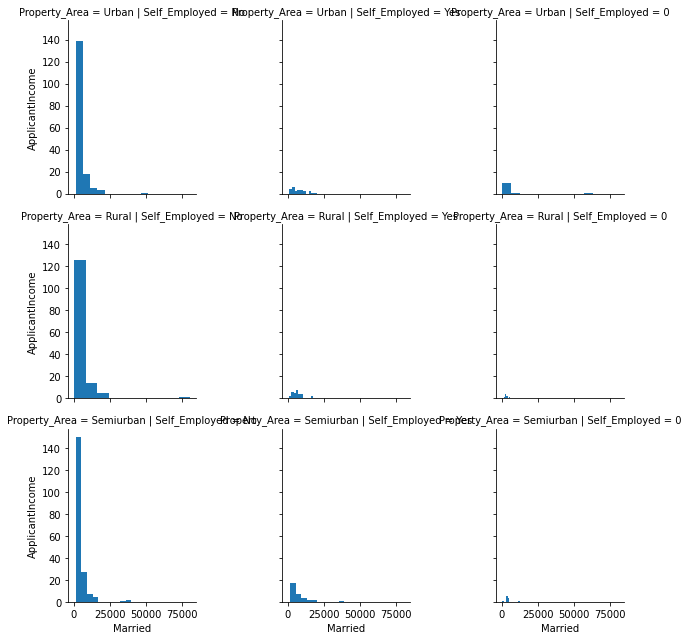

In [130]:
fn = sns.FacetGrid(df,col='Self_Employed',row='Property_Area',height=3, aspect=1)
fn = fn.map(plt.hist,"ApplicantIncome")
fn.set_xlabels('Married')
fn.set_ylabels('ApplicantIncome')

Problem #5 Perform Bi-variate Analysis between Target Variable and each Independent variable. Use suitable plot , mention observations,trends etc

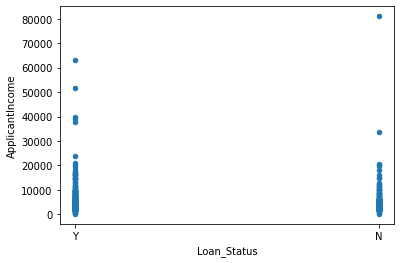

In [38]:
df.plot.scatter(x='Loan_Status',y='ApplicantIncome')

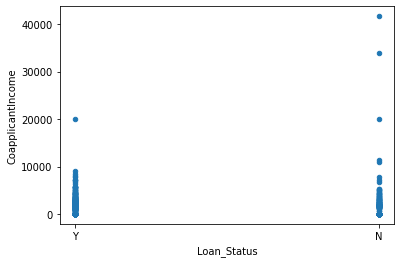

In [39]:
df.plot.scatter(x='Loan_Status',y='CoapplicantIncome')

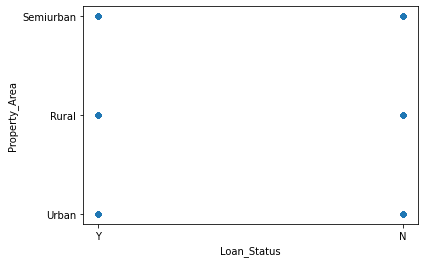

In [40]:
df.plot.scatter(x='Loan_Status',y='Property_Area')

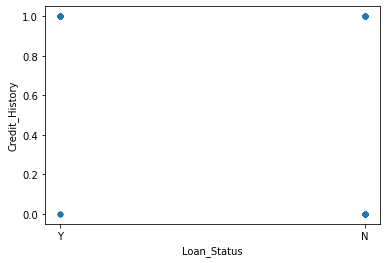

In [41]:
df.plot.scatter(x='Loan_Status',y='Credit_History')

Problem 6 How is the class distribution (Y/N) in Label(Target) Variable ?

In [42]:
df3=df2.groupby('Loan_Status').count()
df3

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,
N,187,192,186,192,183,192,192,181,186,179,192
Y,414,419,413,422,399,422,422,411,414,385,422


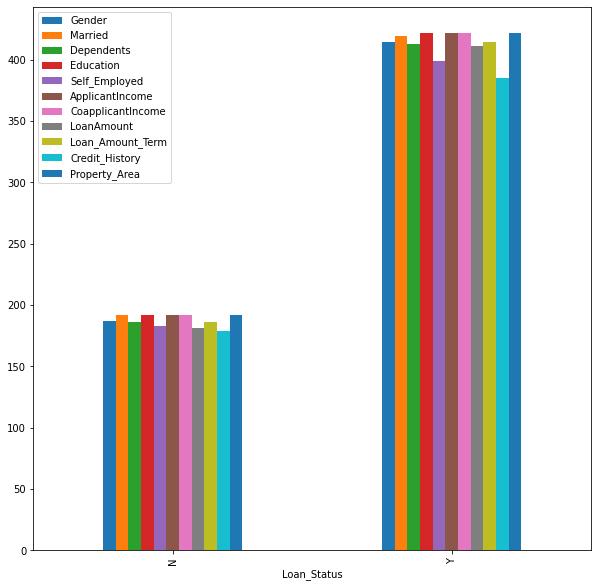

In [43]:
df3.plot.bar(figsize=(10,10))

Problem #7 Identify the Independent Variables that have missing values

In [44]:
#create a dataset of independent variables as df3
df3=df2.drop(['Loan_Status','Loan_Amount_Term','LoanAmount'],axis=1)
df3.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
Credit_History       50
Property_Area         0
dtype: int64

From summary of null values we have observed here Gender,Married,dependent,Self_Employed,credit_History having null values.Now we here fill thises valueswith the median of the data values of particular columns

Problem #8 Handle missing values appropriately , explain the technique applied for each case

In [0]:
df['Gender']=df.Gender.fillna(df["Gender"].value_counts().nlargest(n=1).index[0])
df = df.fillna(0)
for col in df.columns:
  missingPercent = np.mean(df[col].isnull())
  if round(missingPercent*100) >0:
    missingValues = df[col].isnull().sum().sum()

9 Identify the Outliers in each Independent Variable.Distribute the data in each field using Quartile bins (0-25%,25%-50%,50%-75%,75%-100% iles)

In [49]:
print("0 to 25% \n",df3.quantile(0)) 
print("25% to 50%\n",df3.quantile(0.25))
print("50% to 75%\n",df3.quantile(0.50)) 
print("75% t0 100%\n",df3.quantile(0.75))

0 to 25% 
 ApplicantIncome      150.0
CoapplicantIncome      0.0
Credit_History         0.0
Name: 0, dtype: float64
25% to 50%
 ApplicantIncome      2877.5
CoapplicantIncome       0.0
Credit_History          1.0
Name: 0.25, dtype: float64
50% to 75%
 ApplicantIncome      3812.5
CoapplicantIncome    1188.5
Credit_History          1.0
Name: 0.5, dtype: float64
75% t0 100%
 ApplicantIncome      5795.00
CoapplicantIncome    2297.25
Credit_History          1.00
Name: 0.75, dtype: float64


10 Use Box-Plot chart to represent the Outliers for each Independent Variable

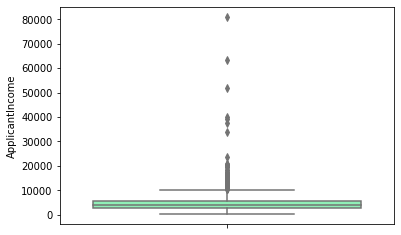

In [53]:
sns.boxplot(y=df3['ApplicantIncome'],palette='rainbow')
#ApplicantIncome contains more outliners as can seen by the below box graph

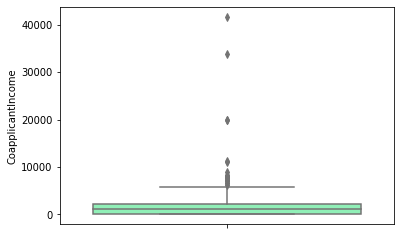

In [56]:
sns.boxplot(y=df3['CoapplicantIncome'],palette='rainbow')
# CoapplicantIncome contains some outliners

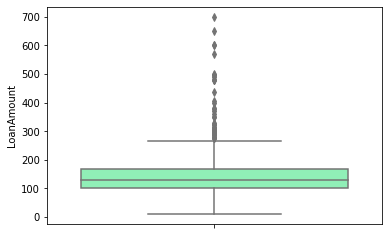

In [68]:
sns.boxplot(y=df['LoanAmount'],palette='rainbow')
# In LoanAmount there are many outliers can be seen.

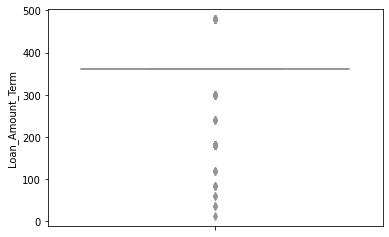

In [67]:
sns.boxplot(y=df['Loan_Amount_Term'],palette='RdBu_r')
#Loan_Amount_Term has one outliner

11 Perform treatment of these Outliers using appropriate techniqies.Explain your approach.

In [133]:
print(df['ApplicantIncome'].quantile(0.1))
print(df['ApplicantIncome'].quantile(0.90))
df["ApplicantIncome"] = np.where(df["ApplicantIncome"] <int(df['ApplicantIncome'].quantile(0.1)), int(df['ApplicantIncome'].quantile(0.1)),df['ApplicantIncome'])
df["ApplicantIncome"] = np.where(df["ApplicantIncome"] >int(df['ApplicantIncome'].quantile(0.9)), int(df['ApplicantIncome'].quantile(0.9)),df['ApplicantIncome'])
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']:
  print(df[i].quantile(0.1))
  print(df[i].quantile(0.90))
  # print(df.skew())
  df[i] = np.where(df[i] <int(df[i].quantile(0.1)), int(df[i].quantile(0.1)),df[i])
  df[i] = np.where(df[i] >int(df[i].quantile(0.9)), int(df[i].quantile(0.9)),df[i])

2216.1000000000004
9459.900000000007
2217.5
9428.400000000005
0.0
3782.200000000002
63.60000000000001
229.4000000000001
180.0
360.0


Step-1

Perform Label Encoding on Target Variable (Loan_Status).

In [86]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer,MultiLabelBinarizer
LE = LabelEncoder()
df_enc=df.copy()
df_enc['Loan_Status'] = LE.fit_transform(enc['Loan_Status'])
df_enc.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


Step-2

1 Perform Label Encoding on Categorical Independent Variables.



In [109]:
from sklearn.preprocessing import OneHotEncoder 
df4=df.drop(['Loan_Status','Loan_ID','LoanAmount','Loan_Amount_Term','ApplicantIncome','CoapplicantIncome'],axis=1)
dfEnc = df.copy()
dfEnc['Self_Employed'].replace({0:"No"},inplace=True)
dfEnc['Married'].replace({0:"No"},inplace=True)
dfEnc['Dependents'].replace({"3+":'3',0:'0'},inplace=True)
for i in categoricalColumns:
  print(i)
  dfEnc[i+"_enc"] = LE.fit_transform(dfEnc[i])
  dfEnc = dfEnc.drop(i,axis=1)
dfEnc.head()

Gender
Married
Dependents
Education
Self_Employed
Credit_History
Property_Area
Loan_Status


,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_enc,Married_enc,Dependents_enc,Education_enc,Self_Employed_enc,Credit_History_enc,Property_Area_enc,Loan_Status_enc
0,LP001002,5849,0.0,0.0,360.0,1,0,0,0,0,1,2,1
1,LP001003,4583,1508.0,128.0,360.0,1,1,1,0,0,1,0,0
2,LP001005,3000,0.0,66.0,360.0,1,1,0,0,1,1,2,1
3,LP001006,2583,2358.0,120.0,360.0,1,1,0,1,0,1,2,1
4,LP001008,6000,0.0,141.0,360.0,1,0,0,0,0,1,2,1


In [110]:
correlation=dfEnc.corr()
correlation.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_enc,Married_enc,Dependents_enc,Education_enc,Self_Employed_enc,Credit_History_enc,Property_Area_enc,Loan_Status_enc
ApplicantIncome,1.000000,-0.116605,0.538290,-0.015645,0.058809,0.050194,0.118202,-0.140760,0.127180,0.006986,-0.009500,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.190377,-0.050321,0.082912,0.080496,0.030430,-0.062290,-0.016100,-0.058795,0.010522,-0.059187
LoanAmount,0.538290,0.190377,1.000000,0.058519,0.095586,0.140023,0.156164,-0.173244,0.109154,-0.032711,-0.056932,-0.010631
Loan_Amount_Term,-0.015645,-0.050321,0.058519,1.000000,-0.049785,-0.079926,-0.035984,-0.108857,-0.029185,0.050145,-0.082139,0.007306
Gender_enc,0.058809,0.082912,0.095586,-0.049785,1.000000,0.367389,0.172914,0.045364,-0.000525,0.026655,-0.025752,0.017987


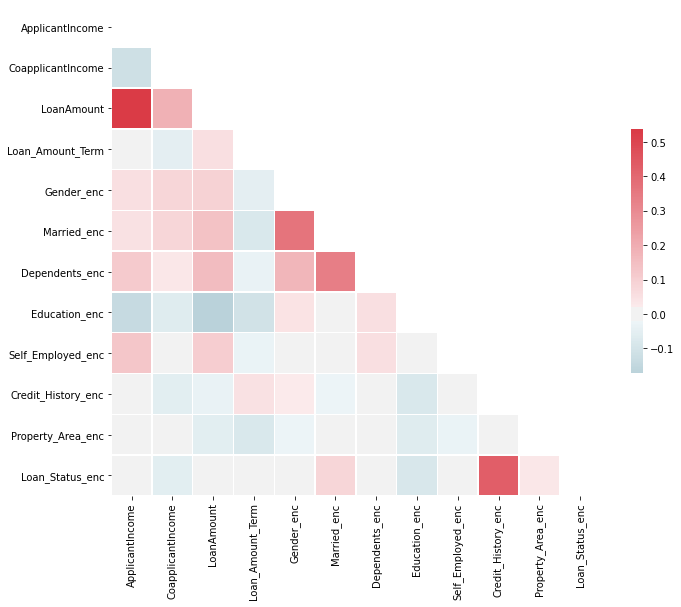

In [112]:
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
svm = sns.heatmap(correlation, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()


step #3 Perform One Hot Encoding on Categorical Independent Variables.

In [117]:
ohe = OneHotEncoder(handle_unknown='ignore')
df_ohe=df.copy()
df_ohe.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
df_enc=pd.get_dummies(df,columns=['Gender','Married','Education','Self_Employed','Loan_Amount_Term','Credit_History',])
df_enc.head()

In [150]:
df_enc.shape

(614, 23)

In [151]:
enc_corr=df_enc.corr()
enc_corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Married_0,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_0,Self_Employed_No,Self_Employed_Yes,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Credit_History_0.0,Credit_History_1.0
ApplicantIncome,1.000000,-0.270163,0.538537,-0.065432,0.065432,0.043316,-0.024300,0.017897,0.206324,-0.206324,-0.040639,-0.188448,0.241964,-0.005326,0.041231,0.022995,-0.014151,-0.059020,0.059020
CoapplicantIncome,-0.270163,1.000000,0.235781,-0.201686,0.201686,-0.053778,-0.246078,0.253135,0.026584,-0.026584,0.012428,0.035203,-0.048360,0.036012,-0.077028,0.032016,-0.028266,0.051313,-0.051313
LoanAmount,0.538537,0.235781,1.000000,-0.138615,0.138615,-0.008795,-0.175003,0.175722,0.180854,-0.180854,0.001312,-0.096967,0.109983,-0.078767,-0.041457,0.012427,0.076217,0.014681,-0.014681
Gender_Female,-0.065432,-0.201686,-0.138615,1.000000,-1.000000,0.027384,0.364569,-0.367389,0.045364,-0.045364,0.041039,-0.023918,0.000525,-0.063279,0.014173,-0.040174,0.070984,0.026655,-0.026655
Gender_Male,0.065432,0.201686,0.138615,-1.000000,1.000000,-0.027384,-0.364569,0.367389,-0.045364,0.045364,-0.041039,0.023918,-0.000525,0.063279,-0.014173,0.040174,-0.070984,-0.026655,0.026655
Married_0,0.043316,-0.053778,-0.008795,0.027384,-0.027384,1.000000,-0.051069,-0.095116,0.037023,-0.037023,-0.016431,0.033459,-0.027510,-0.025136,0.284656,-0.010306,-0.038506,-0.037905,0.037905
Married_No,-0.024300,-0.246078,-0.175003,0.364569,-0.364569,-0.051069,1.000000,-0.989310,0.012304,-0.012304,0.044629,-0.021584,-0.004489,-0.078414,-0.016486,-0.035885,0.090078,-0.018150,0.018150
Married_Yes,0.017897,0.253135,0.175722,-0.367389,0.367389,-0.095116,-0.989310,1.000000,-0.017671,0.017671,-0.042086,0.016628,0.008491,0.081830,-0.025133,0.037273,-0.084165,0.023626,-0.023626
Education_Graduate,0.206324,0.026584,0.180854,0.045364,-0.045364,0.037023,0.012304,-0.017671,1.000000,-1.000000,0.017451,-0.019059,0.010383,-0.120629,-0.006226,-0.004461,0.113213,-0.081637,0.081637
Education_Not Graduate,-0.206324,-0.026584,-0.180854,-0.045364,0.045364,-0.037023,-0.012304,0.017671,-1.000000,1.000000,-0.017451,0.019059,-0.010383,0.120629,0.006226,0.004461,-0.113213,0.081637,-0.081637


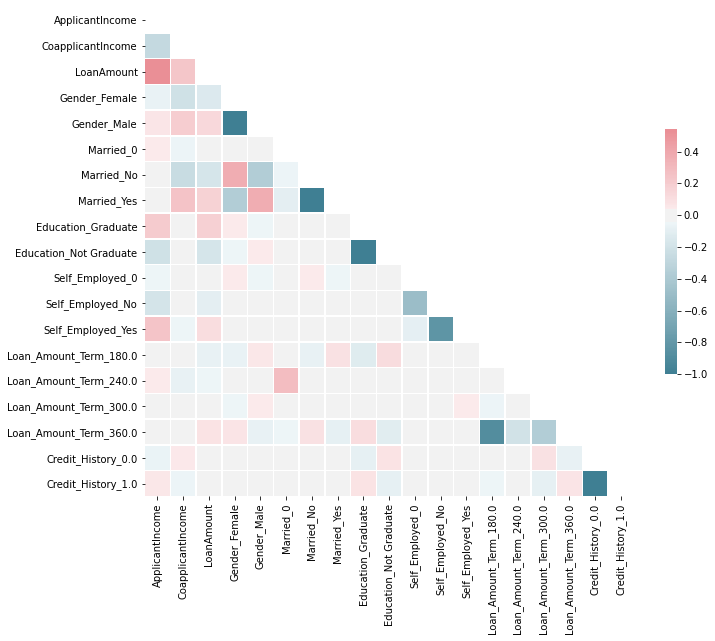

In [152]:
mask = np.zeros_like(enc_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
svm = sns.heatmap(enc_corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})